In [ ]:
# Create pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract sheet names and store in exchanges
exchanges = xls.sheet_names

# Create listings dictionary with all sheet data
listings = pd.read_excel(xls, sheet_name=exchanges, na_values='n/a')

# Inspect NASDAQ listings
listings['nasdaq'].info()


In [ ]:
xls = pd.ExcelFile('listings.xlsx')
exchanges = xls.sheet_names

#create empty list to collect data frames
listings = []
for exchange in exchanges:
    listing = pd.read_excel(xls, sheetname=exchange)
    #add a ref column
    listing['Exchange'] = exchanges
    #add data frame to list
    listings.append(listing)
#listb of dataframes
combined_listings = pd.concat(listings)

In [ ]:
# Import the NYSE and NASDAQ listings
nyse = pd.read_excel('listings.xlsx', sheet_name='nyse', na_values='n/a')
nasdaq = pd.read_excel('listings.xlsx', sheet_name='nasdaq', na_values='n/a')

# Inspect nyse and nasdaq
nyse.info()
nasdaq.info()

# Add Exchange reference columns
nyse['Exchange'] = 'NYSE'
nasdaq['Exchange'] = 'NASDAQ'

# Concatenate DataFrames  
combined_listings = pd.concat([nyse, nasdaq]) 

In [ ]:
# Create the pd.ExcelFile() object
xls = pd.ExcelFile('listings.xlsx')

# Extract the sheet names from xls
exchanges = xls.sheet_names

# Create an empty list: listings
listings = []

# Import the data
for exchange in exchanges:
    listing = pd.read_excel(xls, sheetname=exchange, na_values='n/a')
    listing['Exchange'] = exchange
    listings.append(listing)

# Concatenate the listings: listing_data
listing_data = pd.concat(listings)

# Inspect the results
listing_data.info()

In [18]:
#FED data, fred.stlouisfed.org/
from pandas_datareader.data import DataReader
from datetime import date
series_code = 'DGS10' #10-year Treasury Rate
data_source = 'fred' #FED economic Data Service
start = date(1962,1,1)

data = DataReader(series_code, data_source, start)

In [23]:
series_name = '10-year Treasury'
data = data.rename(columns={series_code: series_name})

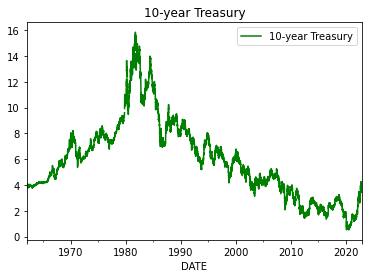

In [26]:
data.plot(title=series_name, color='green');plt.show()

In [28]:
#combine stock and economic data
start = date(2000, 1,1)
series = 'DCOILWTICO' #WEST TEXAS INTERMIDIATE OIL PRICE
oil = DataReader(series,'fred', start)
ticker = 'XOM' #exxon mobile corp
stock = DataReader(ticker, 'google', start)
data = pd.concat(stock[['Close'], oil], axis=1)

data.columns = ['Exxon', 'Oil Price']
data.plot()
plt.show()

NotImplementedError: data_source='google' is not implemented

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 659 entries, 1968-01-01 to 2022-11-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WTISPLC  659 non-null    float64
dtypes: float64(1)
memory usage: 10.3 KB


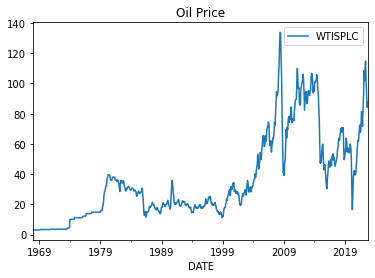

In [30]:
# Set start date
start = date(1968, 1,1)

# Set series code
series = 'WTISPLC'

# Import the data
oil_price = DataReader(series, 'fred', start=start)

# Inspect the price of oil
oil_price.info()

# Plot the price of oil
oil_price.plot(title='Oil Price')

# Show the plot
plt.show()

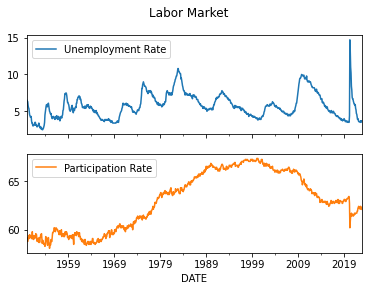

In [31]:
# Set the start date
start = date(1950,1,1)

# Define the series codes
series = ['UNRATE', 'CIVPART']

# Import the data
econ_data = DataReader(series, 'fred',start=start)

# Assign new column labels
econ_data.columns = ['Unemployment Rate', 'Participation Rate']

# Plot econ_data
econ_data.plot(subplots=True, title='Labor Market')

# Show the plot
plt.show()

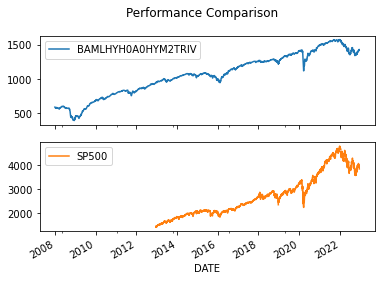

In [34]:
# Set the start date
start = date(2008, 1,1)
# Set the series codes
series = ['BAMLHYH0A0HYM2TRIV', 'SP500']

# Import the data
data = DataReader(series,'fred',start)

# Plot the results
data.plot(subplots=True, title='Performance Comparison')

# Show the plot
plt.show()

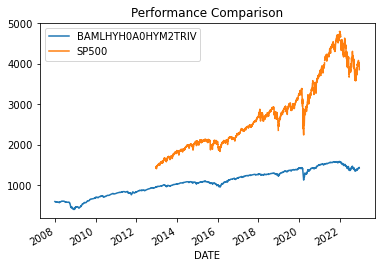

In [35]:
data.plot(title='Performance Comparison');plt.show()

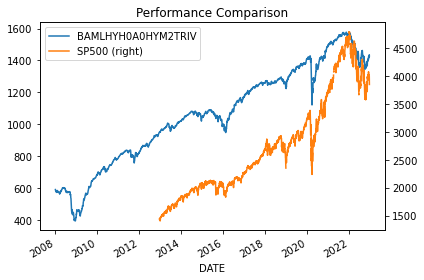

In [36]:
data.plot(title='Performance Comparison', secondary_y='SP500')
plt.tight_layout(); plt.show()

In [ ]:
nyse = pd.read_excel('listings.xlsx', sheetname='nyse', na_values='n/a')
nyse = nyse.sort_values('Market Capitalization', ascending=False)
nyse[['Stock Symbol','Company Name']].head(3)

In [ ]:
largest_by_market_cap = nyse.iloc[0]
largest_by_market_cap['Stock Symbol'] #Select row label

In [ ]:
nyse = nyse_set_index('Stock Symbol') # Stock ticker as index
nyse.info()

In [ ]:
nyse['Market Capitalization'].idxmax() #index of max value

In [ ]:
#get ticker for largest tech company
nyse['Sector'].unique() #Unique values as numpy array
tech =nyse.loc[nyse.Sector == 'Technology']
tech['Company Name'].head(2)

In [ ]:
nyse.loc[nyse.Sector=='Technology',"Market Capitalization"].idxmax()

In [ ]:
ticker = nyse.loc[(nyse.Sector=='Technology') & (nyse['IPO Year']==2017),'Market Capitalization'].idxmax()
data = DataReader(ticker,'google') #start: 2010/1/1
data = data.loc[:, ['Close', 'Volume']]
import matplotlib.pyplot as plt
data.plot(title=ticker, secondary_y='Volume')
plt.tight_layout(); plt.show()

In [ ]:
# Select companies in Consumer Services
consumer_services = listings[listings.Sector == 'Consumer Services']

# Sort consumer_services by market cap
consumer_services2 = consumer_services.sort_values('Market Capitalization', ascending=False)

# Display first 5 rows of designated columns
print(consumer_services2[['Company Name', 'Exchange', 'Market Capitalization']].head())

In [ ]:
# Set the index of listings to Stock Symbol
listings_ss = listings.set_index('Stock Symbol')

# Get ticker of the largest Consumer Services company
ticker = listings_ss.loc[listings_ss.Sector == 'Consumer Services', 'Market Capitalization'].idxmax()
# Set the start date
start = date(2015,1,1)

# Import the stock data
data = DataReader(ticker, 'iex',start=start)

# Plot close and volume
data[['close', 'volume']].plot(secondary_y='volume', title=ticker)

# Show the plot
plt.show()

In [ ]:
# Set Stock Symbol as the index
listings = listings.set_index('Stock Symbol')

# Get ticker of the largest consumer services company listed after 1997
ticker = listings.loc[(listings.Sector == 'Consumer Services') & (listings['IPO Year'] > 1998), 'Market Capitalization'].idxmax()

# Set the start date
start = date(2015,1,1)

# Import the stock data
data = DataReader(ticker, 'iex', start=start)

# Plot close and volume
data[['close', 'volume']].plot(secondary_y='volume',title=ticker)

# Show the plot
plt.show()

## Manage a multi index

In [ ]:
nasdaq = pd.read_excel('listings.xlsx', sheetname='nasdaq', na_values='n/a')
nasdaq.set_index('Stock Symbol', inplace=True)
top_5 = nasdaq['Market Capitalization'].nlargest(n=5) #top 5
top_5.div(1000000) #market cap in million USD
tickers = top_5.index.tolist()

In [ ]:
panel = DataReader(tickers, 'google', start=date(2015,1,1))
#from 3d to familiar data frame
data = panel.to_frame()
#reshape data using unstack() to amke a data frame
unstacked = data['Close'].unstack()


In [ ]:
#stock price visualizations
unstacked.plot(subplots=True)
plt.tight_layout(); plt.show()

In [ ]:
# Set Stock Symbol as the index
listings_ss = listings.set_index('Stock Symbol')

# Get ticker of 3 largest finance companies
top_3_companies = listings_ss.loc[(listings_ss.Sector=='Finance'),'Market Capitalization'].nlargest(n=3)

# Convert index to list
top_3_tickers = top_3_companies.index.tolist()

# Set start date
start = date(2015,1,1)

# Set end date
end = date(2020,4,1)

# Import stock data
result = DataReader(top_3_tickers, 'iex', start, end)
result = result[~result.index.duplicated()]
data = pd.DataFrame()
for ticker in result.columns.levels[1]:
    index = pd.MultiIndex.from_arrays([
            [ticker] * len(result),
            result.index.values
            ], names=['ticker', 'date'])
    ticker_df = pd.DataFrame(index=index)
    for col in result.columns.levels[0]:
        ticker_df[col] = result[col][ticker].values
    data = pd.concat([data, ticker_df])

# Unstack and inspect result
data['close'].unstack().info()

In [ ]:
# Calculate mean
mean = income['Income per Capita'].mean()

# Calculate standard deviation
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean-std, mean+std]
print(bounds)

# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([.25, .75])
print(quantiles)

# Calculate and print IQR
iqr = income['Income per Capita'].quantile(.75) -income['Income per Capita'].quantile(.25)
print(iqr)

In [ ]:
# Generate range of deciles
quantiles = np.arange(0.1,0.91,.1)

# Print them
print(quantiles)

# Calculate deciles for 'Income per Capita'
deciles = income['Income per Capita'].quantile(quantiles)

# Print them
print(deciles)

# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')

# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

In [38]:
#FED data, fred.stlouisfed.org/
from pandas_datareader.data import DataReader
from datetime import date
series_code = 'DGS10' #10-year Treasury Rate
data_source = 'fred' #FED economic Data Service
start = date(1962,1,1)

ty10 = DataReader(series_code, data_source, start)

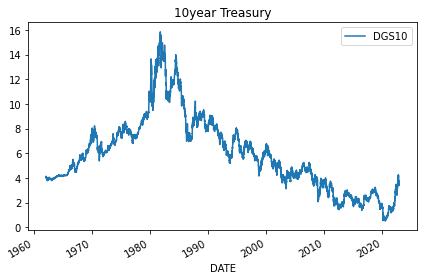

In [43]:
ty10.plot(title='10year Treasury');plt.tight_layout();plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

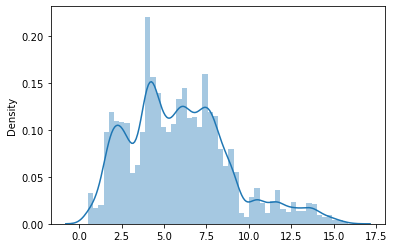

In [48]:
import seaborn as sns
sns.distplot(ty10)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


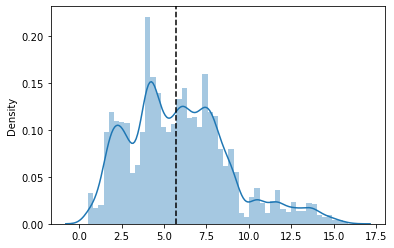

In [51]:
ax = sns.distplot(ty10)
ax.axvline(ty10['DGS10'].median(), color='black', ls='--')

In [ ]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Print the summary statistics for income
print(income.describe())

# Plot a basic histogram of income per capita
sns.distplot(income['Income per Capita'],hist=True)
# Show the plot
plt.show()

# Plot a rugplot
sns.distplot(income['Income per Capita'], bins=50, kde=False, rug=True)

# Show the plot
plt.show()

In [ ]:
# Load the file into growth
growth = pd.read_csv('income_growth.csv', parse_dates=['DATE']).set_index('DATE')

# Inspect the summary statistics for the growth rates
growth.describe()

# Iterate over the three columns
for column in growth.columns:
    sns.distplot(growth[column], hist=False, label=column)
    
# Show the plot
plt.show()

In [ ]:
# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(0.95)]

# Plot histogram and assign to ax
ax = sns.distplot(inc_per_capita, hist=True)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()